In [1]:
import unicodecsv

In [2]:
with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': '2014-11-10',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_udacity': 'True',
 'is_canceled': 'True'}

In [3]:
with open('daily_engagement.csv','rb') as f1:
    reader = unicodecsv.DictReader(f1)
    daily_engagement = list(reader)
daily_engagement[0]

{'acct': '0',
 'utc_date': '2015-01-09',
 'num_courses_visited': '1.0',
 'total_minutes_visited': '11.6793745',
 'lessons_completed': '0.0',
 'projects_completed': '0.0'}

In [4]:
with open('project_submissions.csv','rb') as f2:
    reader = unicodecsv.DictReader(f2)
    project_submissions = list(reader)
project_submissions[0:]

[{'creation_date': '2015-01-14',
  'completion_date': '2015-01-16',
  'assigned_rating': 'UNGRADED',
  'account_key': '256',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'},
 {'creation_date': '2015-01-10',
  'completion_date': '2015-01-13',
  'assigned_rating': 'INCOMPLETE',
  'account_key': '256',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'},
 {'creation_date': '2015-01-20',
  'completion_date': '2015-01-20',
  'assigned_rating': 'PASSED',
  'account_key': '256',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'},
 {'creation_date': '2015-03-10',
  'completion_date': '2015-03-13',
  'assigned_rating': 'PASSED',
  'account_key': '434',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'},
 {'creation_date': '2015-02-17',
  'completion_date': '2015-03-03',
  'assigned_rating': 'INCOMPLETE',
  'account_key': '434',
  'lesson_key': '3176718735',
  'processing_state': 'EVALUATED'},
 {'creation_date': '2015-04-06',
  'completio

In [5]:
from datetime import datetime as dt

def parse_date(date):
    if date =='':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

for enrollment in enrollments:
    enrollment['cancel_date']= parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled']= enrollment['is_canceled']=='True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [6]:
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [7]:
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])
project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

In [8]:
# função para tirar insights
def insight(x,y,z,w,a):
    for i in range(0,300):
        print(x[i][y] ,'/',x[i][z],'/',x[i][w],'/',x[i][a])

In [9]:
insight(project_submissions,'account_key','creation_date','completion_date','assigned_rating')

256 / 2015-01-14 00:00:00 / 2015-01-16 00:00:00 / UNGRADED
256 / 2015-01-10 00:00:00 / 2015-01-13 00:00:00 / INCOMPLETE
256 / 2015-01-20 00:00:00 / 2015-01-20 00:00:00 / PASSED
434 / 2015-03-10 00:00:00 / 2015-03-13 00:00:00 / PASSED
434 / 2015-02-17 00:00:00 / 2015-03-03 00:00:00 / INCOMPLETE
381 / 2015-04-06 00:00:00 / 2015-04-06 00:00:00 / INCOMPLETE
381 / 2015-07-26 00:00:00 / 2015-07-28 00:00:00 / INCOMPLETE
381 / 2015-05-31 00:00:00 / 2015-06-02 00:00:00 / PASSED
381 / 2015-07-29 00:00:00 / 2015-07-29 00:00:00 / PASSED
381 / 2015-07-29 00:00:00 / 2015-07-29 00:00:00 / INCOMPLETE
381 / 2015-04-07 00:00:00 / 2015-04-13 00:00:00 / PASSED
381 / 2015-04-06 00:00:00 / 2015-04-06 00:00:00 / INCOMPLETE
381 / 2015-04-05 00:00:00 / 2015-04-05 00:00:00 / INCOMPLETE
378 / 2015-01-13 00:00:00 / 2015-01-23 00:00:00 / PASSED
23 / 2015-03-19 00:00:00 / 2015-04-02 00:00:00 / PASSED
23 / 2015-01-29 00:00:00 / 2015-02-11 00:00:00 / PASSED
23 / 2015-01-29 00:00:00 / 2015-02-03 00:00:00 / INCOMPLETE


605 / 2015-03-11 00:00:00 / 2015-03-13 00:00:00 / INCOMPLETE
605 / 2015-05-07 00:00:00 / 2015-05-21 00:00:00 / PASSED
313 / 2015-06-04 00:00:00 / None / 
313 / 2015-06-04 00:00:00 / 2015-06-04 00:00:00 / INCOMPLETE
313 / 2015-05-18 00:00:00 / 2015-05-21 00:00:00 / PASSED
313 / 2015-02-25 00:00:00 / 2015-03-02 00:00:00 / PASSED
313 / 2015-04-08 00:00:00 / 2015-04-13 00:00:00 / PASSED
313 / 2015-04-04 00:00:00 / 2015-04-05 00:00:00 / INCOMPLETE
537 / 2015-03-19 00:00:00 / 2015-03-19 00:00:00 / PASSED
537 / 2014-12-30 00:00:00 / 2015-01-13 00:00:00 / PASSED
537 / 2015-03-04 00:00:00 / 2015-03-18 00:00:00 / UNGRADED
581 / 2015-02-23 00:00:00 / 2015-02-24 00:00:00 / PASSED
581 / 2015-03-24 00:00:00 / 2015-03-27 00:00:00 / DISTINCTION
581 / 2015-06-29 00:00:00 / 2015-06-29 00:00:00 / INCOMPLETE
581 / 2015-02-02 00:00:00 / 2015-02-16 00:00:00 / INCOMPLETE
581 / 2015-07-03 00:00:00 / 2015-07-04 00:00:00 / PASSED
629 / 2015-08-03 00:00:00 / 2015-08-04 00:00:00 / INCOMPLETE
629 / 2015-08-05 00:0

In [10]:
insight(daily_engagement,'acct','projects_completed','total_minutes_visited','lessons_completed')

0 / 0 / 11.6793745 / 0
0 / 0 / 37.2848873333 / 0
0 / 0 / 53.6337463333 / 0
0 / 0 / 33.4892696667 / 0
0 / 0 / 64.7796776667 / 0
0 / 0 / 151.617576833 / 1
0 / 0 / 142.395963833 / 0
0 / 0 / 0.0 / 0
0 / 0 / 9.8495625 / 0
0 / 0 / 38.330548 / 0
0 / 0 / 98.3275675 / 1
0 / 0 / 0.0 / 0
0 / 0 / 0.0 / 0
0 / 0 / 218.309690167 / 1
0 / 0 / 280.773319167 / 1
0 / 0 / 32.2760201667 / 0
0 / 0 / 65.467882 / 0
0 / 0 / 74.806089 / 1
0 / 0 / 199.5010495 / 1
0 / 0 / 55.2349593333 / 0
0 / 0 / 212.645668667 / 1
0 / 0 / 96.0037191667 / 1
0 / 0 / 94.333214 / 0
0 / 0 / 40.564986 / 1
0 / 0 / 75.525712 / 0
0 / 0 / 147.728229 / 0
0 / 0 / 38.5299701667 / 1
0 / 0 / 84.9565343334 / 0
0 / 0 / 101.378330333 / 1
0 / 0 / 104.065235 / 1
0 / 0 / 0.0 / 0
0 / 0 / 102.063156833 / 0
0 / 0 / 104.679762333 / 1
0 / 0 / 401.115233 / 2
0 / 0 / 75.988601 / 0
0 / 0 / 29.5425376667 / 1
0 / 0 / 111.8835475 / 0
0 / 0 / 0.0 / 0
0 / 0 / 0.0 / 0
0 / 0 / 0.0 / 0
0 / 0 / 0.0 / 0
0 / 0 / 0.0 / 0
0 / 0 / 32.6505448333 / 0
0 / 0 / 62.9092253333 /

In [11]:
print(len(enrollments)); 
print(len(project_submissions));
print(len(daily_engagement))

1640
3642
136240


In [12]:
#Investigando dados ( separando chaves de contas para saber número de usuários)
def countkey(x,y):
    B=[]
    for i in range(0,len(x)):
        element = x[i][y]
        B.append(element)
    C =[]
    for i in range(0,len(B)-1):
        if B[i]!= B[i+1]:
            C.append(B[i])
    C.append(B[-1])
# print('O numeros de chaves únicas é:',len(C))
#print('O número de chaves é :',len(x))
#print(C)
    return C

In [13]:
countkey(enrollments,'account_key')

['448',
 '700',
 '429',
 '60',
 '1300',
 '369',
 '322',
 '336',
 '553',
 '584',
 '1006',
 '458',
 '1058',
 '206',
 '45',
 '315',
 '604',
 '204',
 '408',
 '51',
 '323',
 '568',
 '130',
 '550',
 '44',
 '1020',
 '838',
 '198',
 '368',
 '440',
 '675',
 '57',
 '1090',
 '541',
 '756',
 '1219',
 '101',
 '1021',
 '1108',
 '800',
 '702',
 '871',
 '38',
 '215',
 '744',
 '217',
 '1221',
 '1211',
 '1051',
 '1286',
 '53',
 '895',
 '283',
 '338',
 '579',
 '903',
 '627',
 '253',
 '861',
 '178',
 '822',
 '96',
 '123',
 '943',
 '620',
 '1204',
 '195',
 '890',
 '354',
 '837',
 '114',
 '810',
 '394',
 '1253',
 '504',
 '537',
 '72',
 '268',
 '339',
 '1244',
 '752',
 '194',
 '520',
 '102',
 '367',
 '258',
 '522',
 '1047',
 '329',
 '225',
 '612',
 '150',
 '179',
 '595',
 '587',
 '439',
 '428',
 '18',
 '544',
 '10',
 '913',
 '23',
 '576',
 '431',
 '223',
 '480',
 '525',
 '1111',
 '1107',
 '577',
 '92',
 '335',
 '275',
 '930',
 '245',
 '135',
 '37',
 '740',
 '186',
 '389',
 '1218',
 '693',
 '770',
 '88',
 '84

In [14]:
countkey(project_submissions,'account_key')

['256',
 '434',
 '381',
 '378',
 '23',
 '616',
 '223',
 '152',
 '1098',
 '273',
 '599',
 '639',
 '324',
 '439',
 '608',
 '30',
 '168',
 '224',
 '1206',
 '575',
 '641',
 '156',
 '232',
 '484',
 '1224',
 '1',
 '611',
 '189',
 '491',
 '535',
 '57',
 '61',
 '375',
 '130',
 '365',
 '90',
 '694',
 '84',
 '618',
 '712',
 '497',
 '605',
 '313',
 '537',
 '581',
 '629',
 '541',
 '207',
 '416',
 '612',
 '258',
 '413',
 '652',
 '412',
 '647',
 '474',
 '150',
 '138',
 '198',
 '309',
 '984',
 '601',
 '606',
 '230',
 '632',
 '83',
 '195',
 '69',
 '361',
 '533',
 '321',
 '7',
 '523',
 '501',
 '68',
 '517',
 '544',
 '250',
 '314',
 '318',
 '415',
 '645',
 '427',
 '311',
 '1298',
 '399',
 '791',
 '391',
 '515',
 '460',
 '103',
 '51',
 '379',
 '12',
 '394',
 '419',
 '36',
 '373',
 '337',
 '196',
 '582',
 '545',
 '516',
 '254',
 '600',
 '356',
 '637',
 '602',
 '380',
 '28',
 '540',
 '75',
 '642',
 '214',
 '518',
 '568',
 '459',
 '383',
 '241',
 '140',
 '452',
 '620',
 '471',
 '587',
 '153',
 '40',
 '440',

In [15]:
countkey(daily_engagement,'acct')

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139

In [16]:
#Outra forma de executar ter o mesmo resultado:
def setkey(x,y):
    unique = set()
    for i in x:
        unique.add(i[y])
    print(len(unique))
    print(len(x))

In [17]:
setkey(daily_engagement,'acct')

1237
136240


In [18]:
#Fazendo vetor com valores das chaves acct
import copy 
x = copy.deepcopy(daily_engagement)
dic_value_daily = []
for i in x:
    dic_value_daily.append(i['acct'])
len(dic_value_daily)

136240

In [19]:
####### Trocando nome acct por account_key em daily_engagement##########

for i in daily_engagement:
    i['account_key'] = i['acct']
    del i['acct']
daily_engagement[0]['account_key']

'0'

In [20]:
unique_enroll = countkey(enrollments,'account_key')
unique_enroll.sort()
unique_enroll

['0',
 '1',
 '10',
 '100',
 '1000',
 '1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '101',
 '1010',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '102',
 '1020',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1029',
 '103',
 '1030',
 '1031',
 '1032',
 '1033',
 '1034',
 '1035',
 '1036',
 '1037',
 '1038',
 '1039',
 '104',
 '1040',
 '1041',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '1049',
 '105',
 '1050',
 '1051',
 '1052',
 '1053',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '106',
 '1060',
 '1061',
 '1062',
 '1063',
 '1064',
 '1065',
 '1066',
 '1067',
 '1068',
 '1069',
 '107',
 '1070',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1079',
 '108',
 '1080',
 '1081',
 '1082',
 '1083',
 '1084',
 '1085',
 '1086',
 '1087',
 '1088',
 '1089',
 '109',
 '1090',
 '1091',
 '1092',
 '1093',
 '1094',
 '1095',
 '1096',
 '1097',
 '1098',
 '1099',
 

In [21]:
unique_d = countkey(daily_engagement,'account_key')
unique_d

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139

In [22]:
#Diferença entre conjuntos
dif = set(unique_enroll).difference(set(unique_d))
list_dif = list(dif)
list_dif 

['749',
 '1304',
 '996',
 '884',
 '739',
 '1079',
 '1148',
 '750',
 '664',
 '707',
 '819',
 '1171',
 '870',
 '875',
 '727',
 '1086',
 '1010',
 '1222',
 '841',
 '968',
 '1129',
 '1101',
 '1241',
 '1125',
 '1044',
 '799',
 '871',
 '1069',
 '1186',
 '1025',
 '1219',
 '902',
 '817',
 '1218',
 '728',
 '981',
 '1191',
 '1145',
 '889',
 '1273',
 '1155',
 '914',
 '1063',
 '1237',
 '717',
 '711',
 '766',
 '1120',
 '926',
 '725',
 '733',
 '964',
 '1270',
 '789',
 '878',
 '1284',
 '1291',
 '654',
 '997',
 '1238',
 '803',
 '737',
 '1190',
 '1213',
 '802']

In [23]:
len(list_dif)

65

In [24]:
enrollments[90]['account_key']

'895'

In [25]:
#Descobrindo porque alguns valores estão em enrollments e não em daily_engagement;
c = 0
for i in list_dif:
    for j in range(len(enrollments)):
        if i == enrollments[j]['account_key']:
            print(enrollments[j]) 
            print(daily_engagement[j])
            c+=1
            break
print('Número de impressões:',c)    

{'account_key': '749', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 5, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 5, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}
{'utc_date': datetime.datetime(2015, 6, 29, 0, 0), 'num_courses_visited': 0, 'total_minutes_visited': 0.0, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '3'}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'utc_date': datetime.datetime(2014, 12, 24, 0, 0), 'num_courses_visited': 0, 'total_minutes_visited': 0.0, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '3'}
{'account_key': '996', 'status': 'canceled', 'join_date': datetime.datetime(2015, 5, 29, 0, 0), 'cancel_date': datetime.datetime(2015, 5, 29, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}
{'utc_date':

In [26]:
#Outra forma de obter os mesmo resutlado
#(Este código printa somente um linha mesmo/ se você for prestar atenção pode perceber na primeira linha o padrão)
c = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_d:
        print(enrollment)
        break

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


In [27]:
c = 0
for i in list_dif:
    for j in range(len(enrollments)):
        if i == enrollments[j]['account_key']:
            print(enrollments[j]['days_to_cancel'])
            print(enrollments[j]) 
            print(daily_engagement[j])
            print('////')
            c+=1
            
print(c)  

0
{'account_key': '749', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 5, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 5, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}
{'utc_date': datetime.datetime(2015, 6, 29, 0, 0), 'num_courses_visited': 0, 'total_minutes_visited': 0.0, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '3'}
////
59
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'utc_date': datetime.datetime(2014, 12, 24, 0, 0), 'num_courses_visited': 0, 'total_minutes_visited': 0.0, 'lessons_completed': 0, 'projects_completed': 0, 'account_key': '3'}
////
99
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled':

In [28]:
c = 0
for i in list_dif:
    for j in range(len(enrollments)):
        if i == enrollments[j]['account_key'] and enrollments[j]['days_to_cancel']!=0:
            print(enrollments[j])
            c+=1
print('O número de estudantes estranhos é:',c)
        

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}
O número de estudantes estranhos é: 3


In [29]:
#Para veriicar o que fazer, veja que estas são contas de teste, pois is_udacity = True, além disso, pode ser que existam 
# outras contas desse mesmo tipo, por isso vamos identificar se existe alguma mais contas desse tipo
udacity_teste_contas = set()
for enrollment in enrollments:
    if enrollment['is_udacity']: # Se for True a condição é executada
        udacity_teste_contas.add(enrollment['account_key'])
udacity_teste_contas

{'1069', '1101', '1304', '312', '448', '818'}

In [30]:
#Agora que sabemos que existem 6 valores de teste da udacity, vamos excluílos
# Primeiro criamos uma função que permita fazer isso
def remove_contas(data):
    udacity_nteste = []
    for d in data: 
        if d['account_key'] not in udacity_teste_contas:
            udacity_nteste.append(d)

    return udacity_nteste   

In [31]:
#Segundo armazemamos em variáveis para preservar o conjunto original 
non_enrollment_ud = remove_contas(enrollments)
non_daily_engagement_ud = remove_contas(daily_engagement)
non_project_submissions_ud = remove_contas(project_submissions)

print(len(non_enrollment_ud))
print(len(non_daily_engagement_ud))
print(len(non_project_submissions_ud))

1622
135656
3634


In [32]:
# A seguir duas formas de resolver o problema de refinanção de perguntas, colocando especificações em relação aos estudantes,
# isto é, restringindo a um conjunto mais adequado para análise, neste caso, o que faz sentido é analisar aqueles que tiveram
# assiduidade no curso e que não são contas da udacity
paid_student_1 ={}
for enrollment in non_enrollment_ud:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel']>7:
        account_key = enrollment['account_key']
        data_join = enrollment['join_date']
        paid_student_1[account_key]= data_join
len(paid_student_1)

995

In [33]:
#Alteração de código para padronizar o usuário com matrícula repetida para a mais recente
paid_students={}
for non_enrollment in non_enrollment_ud:
    student = non_enrollment['days_to_cancel']
    if student is None or student>7:
        if non_enrollment['account_key'] not in paid_students or\
            non_enrollment['join_date']> paid_students[non_enrollment['account_key']]:
            paid_students[non_enrollment['account_key']] = non_enrollment['join_date'] 
        

In [34]:
paid_students

{'429': datetime.datetime(2015, 3, 10, 0, 0),
 '60': datetime.datetime(2015, 4, 1, 0, 0),
 '369': datetime.datetime(2014, 11, 10, 0, 0),
 '322': datetime.datetime(2015, 3, 10, 0, 0),
 '336': datetime.datetime(2014, 11, 10, 0, 0),
 '553': datetime.datetime(2014, 11, 10, 0, 0),
 '584': datetime.datetime(2015, 3, 10, 0, 0),
 '458': datetime.datetime(2015, 4, 6, 0, 0),
 '1058': datetime.datetime(2015, 3, 10, 0, 0),
 '206': datetime.datetime(2014, 11, 10, 0, 0),
 '45': datetime.datetime(2015, 3, 10, 0, 0),
 '315': datetime.datetime(2014, 11, 10, 0, 0),
 '604': datetime.datetime(2014, 11, 10, 0, 0),
 '204': datetime.datetime(2014, 11, 10, 0, 0),
 '408': datetime.datetime(2015, 4, 1, 0, 0),
 '51': datetime.datetime(2015, 3, 10, 0, 0),
 '323': datetime.datetime(2014, 11, 10, 0, 0),
 '568': datetime.datetime(2014, 11, 10, 0, 0),
 '130': datetime.datetime(2015, 4, 1, 0, 0),
 '550': datetime.datetime(2015, 5, 28, 0, 0),
 '44': datetime.datetime(2015, 3, 10, 0, 0),
 '198': datetime.datetime(2014, 

In [35]:
# Pega a data de ingresso de um aluno e a data de um registro de engajamento específico,
# e retorna True se esse registro de engajamento aconteceu em uma semana
# do aluno ingressando.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return 0<=time_delta.days<7

In [36]:
## Crie uma lista de linhas da tabela de engajamento, incluindo apenas as linhas em que
## o aluno é um dos alunos pagos que você acabou de encontrar e a data está dentro
## uma semana da data de ingresso do aluno.
#paid_engagement_in_first_week =[]
#for paid in non_enrollment_ud:
#    student = within_one_week(paid['join_date'], paid['cancel_date'])
#    if student == True:
#        paid_engagement_in_first_week.append(paid)
##### Este código não funciona porque é necessário pegar join_date e utc_date, assim, é preciso reformular as ideias
####  para conseguir executar o código correto...

In [37]:
# Solução : Obtendo dados da primeira semana
def remove_os_free(data):
    new_data=[]
    for dp in data:
        if dp['account_key'] in paid_students:
            new_data.append(dp)
    return new_data

In [38]:
paid_enrollments  =  remove_os_free ( non_enrollment_ud ) 
paid_engagement  =  remove_os_free ( non_daily_engagement_ud ) 
paid_submissions  =  remove_os_free( non_project_submissions_ud)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [39]:
# Código certo
paid_engagement_in_first_week =[]
for engagement in paid_engagement:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engagement_date = engagement['utc_date']
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)
len(paid_engagement_in_first_week)

6919

In [40]:
from collections import defaultdict
engagement_by_account= defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key= engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [41]:
engagement_by_account

defaultdict(list,
            {'0': [{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
               'num_courses_visited': 1,
               'total_minutes_visited': 11.6793745,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 10, 0, 0),
               'num_courses_visited': 2,
               'total_minutes_visited': 37.2848873333,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 11, 0, 0),
               'num_courses_visited': 2,
               'total_minutes_visited': 53.6337463333,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 12, 0, 0),
               'num_courses_visited': 1,
               'total_minutes_visited': 33.4892

In [42]:
# O código a seguir calculrará as médias de minutos gastos em aulas por grupos especificados
total_minutes_by_account={}
for account_key, engagement_for_students in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_students:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [43]:
total_minutes_by_account

{'0': 494.88049616599994,
 '1': 18.576384666670002,
 '2': 0.0,
 '3': 0.0,
 '4': 33.3214046667,
 '5': 329.7578566663,
 '6': 780.4545511666701,
 '7': 104.20388850009999,
 '8': 989.113641833,
 '9': 448.471384167,
 '10': 130.12347833367,
 '11': 0.0,
 '12': 179.4719088333,
 '13': 1013.3833969996999,
 '14': 65.6221875,
 '15': 983.375040335,
 '16': 119.12030049999998,
 '17': 235.49969150033,
 '18': 155.1361575,
 '19': 0.0,
 '20': 447.93897783336996,
 '21': 931.1036911666699,
 '22': 657.2052335000001,
 '23': 1591.3228143334,
 '24': 943.188117167,
 '25': 0.0,
 '26': 430.801675833,
 '27': 1579.12122666663,
 '28': 766.256315667,
 '29': 556.1906033333,
 '30': 69.6578351667,
 '31': 0.0,
 '32': 123.2915048333,
 '33': 253.9870258334,
 '34': 180.413814,
 '35': 765.6402170004,
 '36': 809.2138958339,
 '37': 1378.195091668,
 '38': 0.0,
 '39': 1001.5888595,
 '40': 478.21952616690004,
 '41': 511.925391,
 '42': 576.4643026663,
 '43': 88.822038,
 '44': 0.0,
 '45': 0.0,
 '46': 26.1189351667,
 '47': 854.828888

In [44]:
# Feito para descobrir o que estava de errado com o valor extremo de mais de uma semana: realmente o problema era com o
# código fonte de 1 semana que não pegava restrição da primeira semana, mas sim, toda vez que o aluno saia e iniciava de
# novo ele recomeçava a contar
##### Imprimindo elemento outlier #####
for i in engagement_by_account['108']:
    print('total_minutes_visited : ', i['total_minutes_visited'],'/','days :', i['utc_date'])
    print('num_courses_visited:',i['num_courses_visited'])

total_minutes_visited :  25.9137858334 / days : 2015-04-20 00:00:00
num_courses_visited: 2
total_minutes_visited :  3.40682316667 / days : 2015-04-21 00:00:00
num_courses_visited: 1
total_minutes_visited :  99.1186611667 / days : 2015-04-22 00:00:00
num_courses_visited: 2
total_minutes_visited :  35.8316206667 / days : 2015-04-23 00:00:00
num_courses_visited: 1
total_minutes_visited :  0.0 / days : 2015-04-24 00:00:00
num_courses_visited: 0
total_minutes_visited :  0.0 / days : 2015-04-25 00:00:00
num_courses_visited: 0
total_minutes_visited :  0.0 / days : 2015-04-26 00:00:00
num_courses_visited: 0


In [45]:
total_minutes_by_account

{'0': 494.88049616599994,
 '1': 18.576384666670002,
 '2': 0.0,
 '3': 0.0,
 '4': 33.3214046667,
 '5': 329.7578566663,
 '6': 780.4545511666701,
 '7': 104.20388850009999,
 '8': 989.113641833,
 '9': 448.471384167,
 '10': 130.12347833367,
 '11': 0.0,
 '12': 179.4719088333,
 '13': 1013.3833969996999,
 '14': 65.6221875,
 '15': 983.375040335,
 '16': 119.12030049999998,
 '17': 235.49969150033,
 '18': 155.1361575,
 '19': 0.0,
 '20': 447.93897783336996,
 '21': 931.1036911666699,
 '22': 657.2052335000001,
 '23': 1591.3228143334,
 '24': 943.188117167,
 '25': 0.0,
 '26': 430.801675833,
 '27': 1579.12122666663,
 '28': 766.256315667,
 '29': 556.1906033333,
 '30': 69.6578351667,
 '31': 0.0,
 '32': 123.2915048333,
 '33': 253.9870258334,
 '34': 180.413814,
 '35': 765.6402170004,
 '36': 809.2138958339,
 '37': 1378.195091668,
 '38': 0.0,
 '39': 1001.5888595,
 '40': 478.21952616690004,
 '41': 511.925391,
 '42': 576.4643026663,
 '43': 88.822038,
 '44': 0.0,
 '45': 0.0,
 '46': 26.1189351667,
 '47': 854.828888

In [46]:
#keys_bigger_then_week={}
#for element in total_minutes_by_account.keys():
#    if total_minutes_by_account[element]>10000:
#         keys_bigger_then_week[element] = total_minutes_by_account[element]

In [47]:
#keys_less_than_week= {}
#for element in total_minutes_by_account.keys():
#    if total_minutes_by_account[element]<10080:
#         keys_less_than_week[element] = total_minutes_by_account[element]

In [48]:
total_minutes = list(total_minutes_by_account.values())
import numpy as np
print('Média: ',np.mean(total_minutes))
print('Desvio padrão:',np.std(total_minutes))
print('Máximo', np.max(total_minutes))
print('Mínimo', np.min(total_minutes))

Média:  306.70832675342825
Desvio padrão: 412.99693340852957
Máximo 3564.7332644989997
Mínimo 0.0


In [49]:
def arround(number):
    return round(number, 2)

In [50]:
def description(local):
    total_minutes_by_account={}
    for account_key, engagement_for_students in engagement_by_account.items():
        total_minutes = 0
        for engagement_record in engagement_for_students:
            total_minutes += engagement_record[local]
        total_minutes_by_account[account_key] = total_minutes
    total_minutes = list(total_minutes_by_account.values())
   
    print('Média: ',round(np.mean(total_minutes),2))
    print('Desvio padrão:', round(np.std(total_minutes),2))
    print('Máximo:', round(np.max(total_minutes),2))
    print('Mínimo:', round(np.min(total_minutes),2))
    return total_minutes_by_account

In [51]:
engagement_by_account

defaultdict(list,
            {'0': [{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
               'num_courses_visited': 1,
               'total_minutes_visited': 11.6793745,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 10, 0, 0),
               'num_courses_visited': 2,
               'total_minutes_visited': 37.2848873333,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 11, 0, 0),
               'num_courses_visited': 2,
               'total_minutes_visited': 53.6337463333,
               'lessons_completed': 0,
               'projects_completed': 0,
               'account_key': '0'},
              {'utc_date': datetime.datetime(2015, 1, 12, 0, 0),
               'num_courses_visited': 1,
               'total_minutes_visited': 33.4892

In [52]:
description('lessons_completed')

Média:  1.64
Desvio padrão: 3.0
Máximo: 36
Mínimo: 0


{'0': 1,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 6,
 '7': 1,
 '8': 7,
 '9': 2,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 10,
 '14': 0,
 '15': 1,
 '16': 1,
 '17': 1,
 '18': 0,
 '19': 0,
 '20': 2,
 '21': 12,
 '22': 5,
 '23': 6,
 '24': 4,
 '25': 0,
 '26': 2,
 '27': 3,
 '28': 2,
 '29': 5,
 '30': 1,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 1,
 '35': 4,
 '36': 4,
 '37': 5,
 '38': 0,
 '39': 10,
 '40': 6,
 '41': 1,
 '42': 2,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 13,
 '48': 12,
 '49': 0,
 '50': 2,
 '51': 0,
 '52': 0,
 '53': 3,
 '54': 1,
 '55': 4,
 '56': 0,
 '57': 1,
 '58': 3,
 '59': 0,
 '60': 0,
 '61': 2,
 '62': 1,
 '63': 5,
 '64': 6,
 '65': 3,
 '66': 0,
 '67': 2,
 '68': 0,
 '69': 0,
 '70': 2,
 '71': 0,
 '72': 7,
 '73': 0,
 '74': 0,
 '75': 0,
 '76': 0,
 '77': 0,
 '78': 0,
 '79': 1,
 '80': 1,
 '81': 2,
 '82': 1,
 '83': 3,
 '84': 5,
 '85': 1,
 '86': 0,
 '87': 1,
 '88': 0,
 '89': 1,
 '90': 1,
 '91': 1,
 '92': 3,
 '93': 3,
 '94': 0,
 '96': 0,
 '97': 0,
 '98': 2,
 '99': 2,
 '100': 1,
 '10

In [56]:
def description_for_num_courses_days(local,x):
    total_days_by_account={}
    for account_key, engagement_for_students in local.items():
        total_days = 0
        for engagement_record in engagement_for_students:
            if engagement_record[local]>0:
                total_days += 1
            else:
                total_days+=0
        total_days_by_account[account_key] = total_days
    total_days = list(total_minutes_by_account.values())
   
    print('Média: ',(np.mean(total_minutes)))
    print('Desvio padrão:', (np.std(total_minutes)))
    print('Máximo:', (np.max(total_minutes)))
    print('Mínimo:', (np.min(total_minutes)))
    return total_minutes_by_account

In [58]:
## Crie duas listas de dados de engajamento para alunos pagos na primeira semana.
## A primeira lista deve conter dados para os alunos que eventualmente passarem no
## projeto de metrô, e a segunda lista deve conter dados para alunos
## quem não.
subway_project_lesson_keys = ['746169184', '3176718735']


In [59]:
#Conjuntos do que passaram no primeiro projeto
pass_subway_project = set()
for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and\
        (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
print(len(pass_subway_project))

647


In [60]:
# Conjuntos dos dados de envolvimento dos alunos que passarram e que não passaram no primeiro projeto
passing_engagement =[]
non_passing_engagement=[]

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


In [61]:
passing_engagement[0]

{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0,
 'account_key': '0'}

In [62]:
#Transformando valores em chave e valor para cálculo de médias
from collections import defaultdict
def transformation_kv(conj):
    engagement_by_account= defaultdict(list)
    for engagement_record in conj:
        account_key= engagement_record['account_key']
        engagement_by_account[account_key].append(engagement_record)
    return engagement_by_account

In [63]:
# Para transformar somar os valores de cada chave e armazenar numa lista kv
def kv_var(local,var):
    total= {}
    for account_key, value_key in local.items():
        total_var= 0
        for element in value_key:
            if var =='num_courses_visited' and element[var]!=0:
                total_var+=1
            elif var=='num_courses_visited' and element[var] == 0:
                total_var+=0 
            else:
                total_var+= element[var]
        total[account_key] = total_var
    return total

In [64]:
transformat_passing = transformation_kv(passing_engagement)
num_days_visited = kv_var(transformat_passing,'num_courses_visited')
num_minutes_visited = kv_var(transformat_passing, 'total_minutes_visited')
num_lesson_completed = kv_var(transformat_passing, 'lessons_completed')
num_project_completed = kv_var(transformat_passing,'projects_completed')

In [65]:
#Calculando as médias de quem passou
import numpy as np
mean_num_days_visited = np.mean(list(num_days_visited.values()))
mean_num_minutes_visited = np.mean(list(num_minutes_visited.values()))
mean_num_lesson_completed = np.mean(list(num_lesson_completed.values()))
num_project_completed = np.mean(list(num_project_completed.values()))
print(mean_num_days_visited)
print(mean_num_minutes_visited)
print(mean_num_lesson_completed)
print(num_project_completed)

3.384853168469861
394.58604648350865
2.052550231839258
0.00927357032457496


In [66]:
transformat_non_passing = transformation_kv(non_passing_engagement)
num_days_visited_non = kv_var(transformat_non_passing,'num_courses_visited')
num_minutes_visited_non= kv_var(transformat_non_passing, 'total_minutes_visited')
num_lesson_completed_non = kv_var(transformat_non_passing, 'lessons_completed')
num_project_completed_non = kv_var(transformat_non_passing,'projects_completed')

In [67]:
#Calculando as médias de quem não passou
mean_num_days_visited_non = np.mean(list(num_days_visited_non.values()))
mean_num_minutes_visited_non= np.mean(list(num_minutes_visited_non.values()))
mean_num_lesson_completed_non = np.mean(list(num_lesson_completed_non.values()))
num_project_completed_non = np.mean(list(num_project_completed_non.values()))
print(mean_num_days_visited_non)
print(mean_num_minutes_visited_non)
print(mean_num_lesson_completed_non)
print(num_project_completed_non)

1.9051724137931034
143.32647426675584
0.8620689655172413
0.0


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
data_mean1 =  list(num_days_visited.values())
data_mean2 =list(num_minutes_visited.values())
data_mean3 = list(num_lesson_completed.values())
data_mean4 = list(num_days_visited_non.values())
data_mean5 = list(num_minutes_visited_non.values())
data_mean6 = list(num_lesson_completed_non.values())

Text(0.5, 0, 'Número de dias')

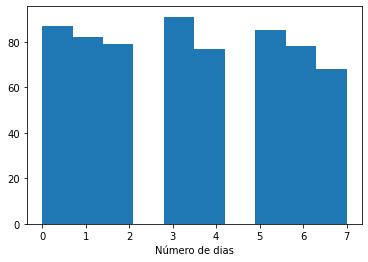

In [95]:
plt.hist(data_mean1)
plt.xlabel("Número de dias")

(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]), array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
       1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
       2851.7866116 , 3208.25993805, 3564.7332645 ]), <BarContainer object of 10 artists>)


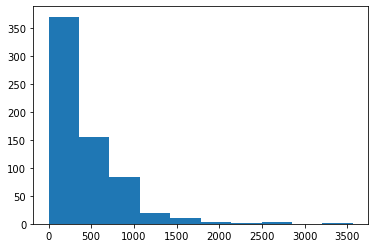

In [70]:
print(plt.hist(data_mean2))

(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]), array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]), <BarContainer object of 10 artists>)


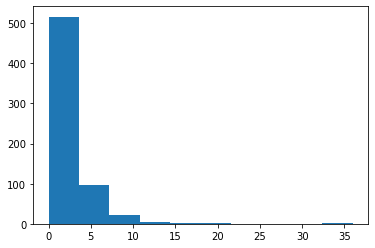

In [71]:
print(plt.hist(data_mean3))

(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

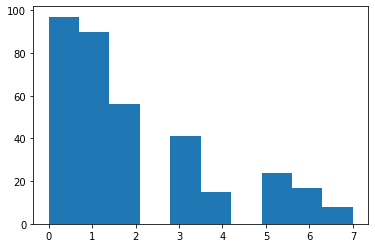

In [72]:
plt.hist(data_mean4)

(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <BarContainer object of 10 artists>)

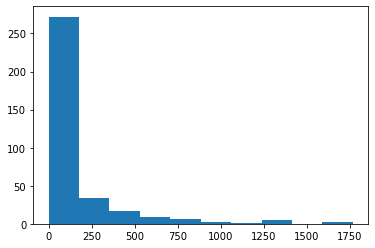

In [73]:
plt.hist(data_mean5)

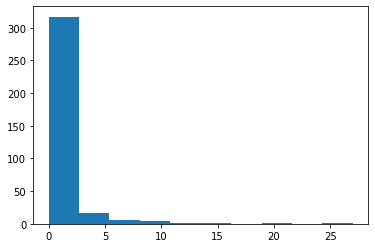

In [83]:
plt.hist(data_mean6)

In [75]:
!pip install seaborn

In [76]:
import seaborn as sns

Text(0.5, 1.0, 'Distribuição número de alunos x dias de engajamento\npara estudantes que passaram no primeiro projeto ')

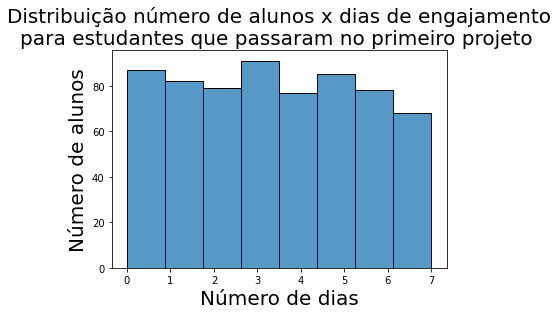

In [110]:
p = sns.histplot(data_mean1, bins = 8)
p.set_xlabel("Número de dias",fontsize = 20)
p.set_ylabel("Número de alunos",fontsize =20)
p.set_title("Distribuição número de alunos x dias de engajamento\npara estudantes que passaram no primeiro projeto ",fontsize = 20)